# # Data Science Project - Sales Forecast

- The challenge is to being able to predict the sales we will have in a given period based on ad spending on the 3 major networks that the Hashtag company invests in: TV, Newspaper and Radio.
- TV, Newspaper and Radio are in thousands of reais
- Sales are in millions

#### Importing the Dataset

In [9]:
import pandas as pd

dados = pd.read_csv('advertising.csv')
dados

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [10]:
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

#### EDA
- Let's try to visualize how the information of each item is distributed and see the correlation between each of the items.

<function matplotlib.pyplot.show(close=None, block=None)>

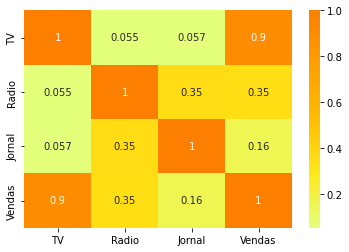

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# print(dados.corr())

sns.heatmap(dados.corr(), cmap= 'Wistia', annot= True)
plt.show

#### Machine Learning Model

- Separating into training data and test data.

In [12]:
from sklearn.model_selection import train_test_split

# x -> Data for predictions
# y -> Forecasts(Sales)

y = dados['Vendas']
x = dados.drop('Vendas', axis=1)

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size= 0.3)

#### We have a regression problem - Let's choose the models we are going to use:

- Linear Regression
- RandomForest (Decision Tree)

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import numpy as np

# creating the AI
modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

# training the AI
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)

RandomForestRegressor()

#### Testing the AI e choosing the best model.

- We're going to use the R² -> Tells us % that our model can explain what happens

In [14]:
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

print(metrics.r2_score(y_teste, previsao_regressaolinear))
print(metrics.r2_score(y_teste, previsao_arvoredecisao))  

0.9173171494462773
0.955187126827224


#### Graphic View of Forecasts

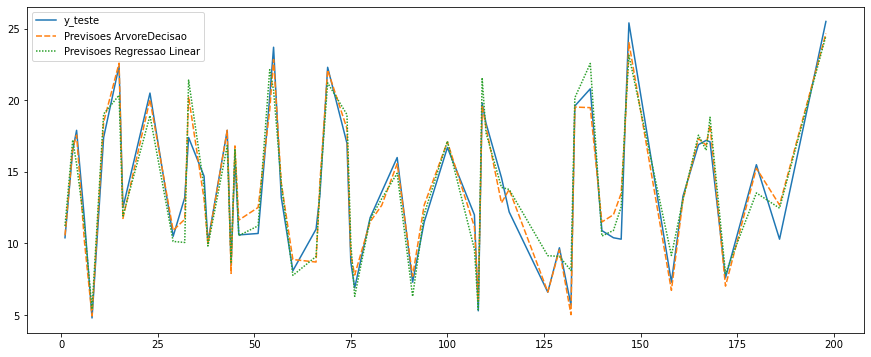

In [15]:
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar["y_teste"] = y_teste
tabela_auxiliar["Previsoes ArvoreDecisao"] = previsao_arvoredecisao
tabela_auxiliar["Previsoes Regressao Linear"] = previsao_regressaolinear

plt.figure(figsize=(15,6))
sns.lineplot(data=tabela_auxiliar)
plt.show()

#### Comparative Chart

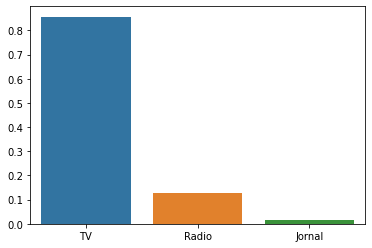

In [16]:
sns.barplot(x=x_treino.columns, y=modelo_arvoredecisao.feature_importances_)
plt.show()